Importing necessary libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [39]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()



,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Dropping Unnamed column

In [40]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [41]:
df.shape

(300153, 11)

Information of dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [43]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Checking missing values in dataset

In [44]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

No null values in above dataset.

Data Visualization

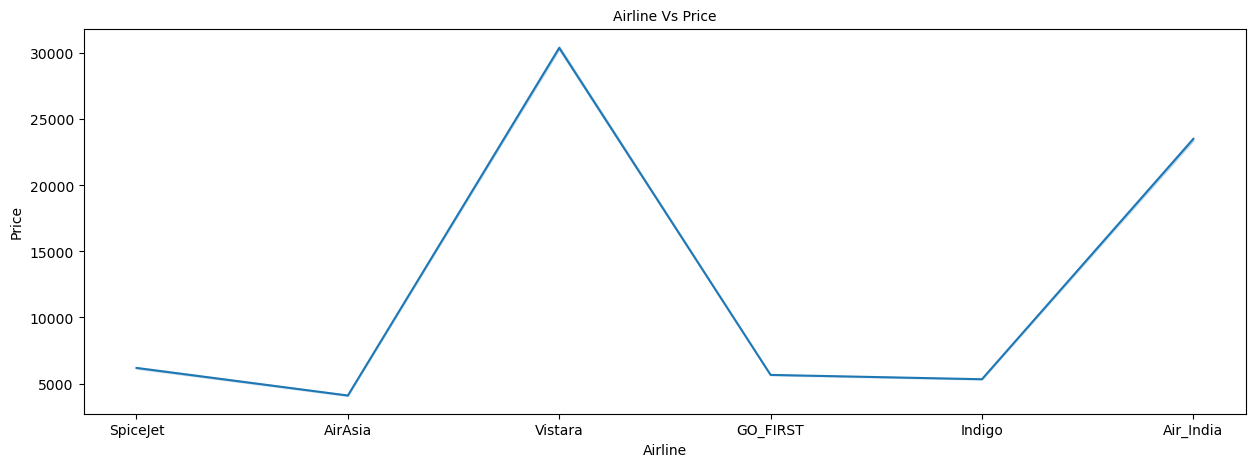

In [45]:
plt.figure(figsize = (15,5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title('Airline Vs Price', fontsize=10)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

We find that there in price with different Airlines

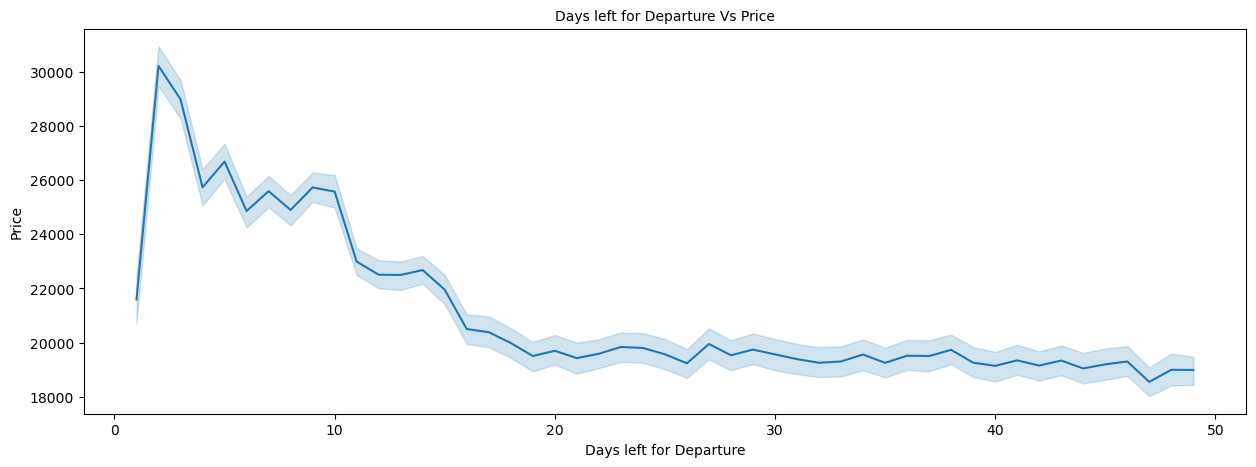

In [46]:
plt.figure(figsize = (15,5))
sns.lineplot(x = df['days_left'], y = df['price'])
plt.title('Days left for Departure Vs Price', fontsize=10)
plt.xlabel('Days left for Departure')
plt.ylabel('Price')
plt.show()

Price Range of all Flights

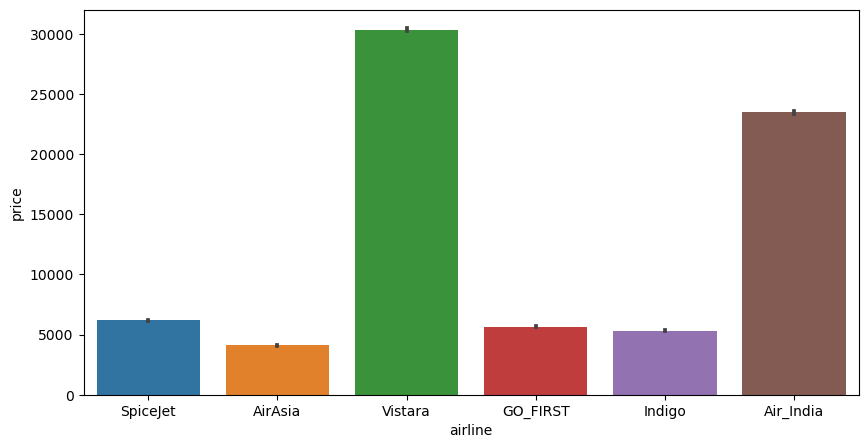

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x = 'airline', y = 'price')
plt.show()

As per the above figure, Vistara is having highest Price.

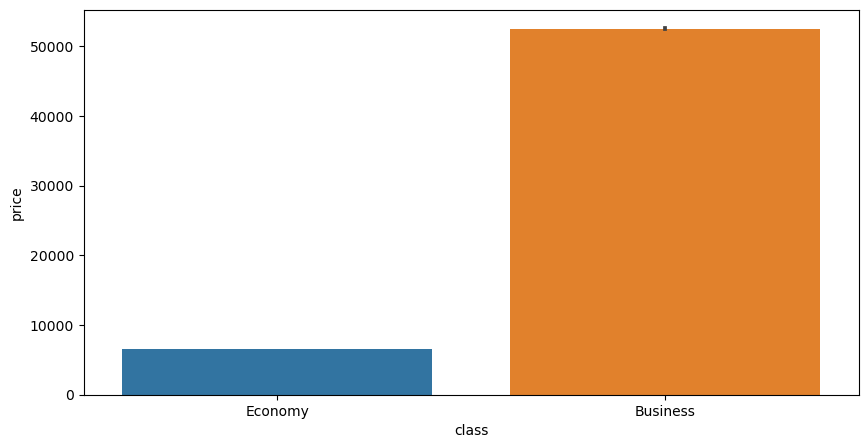

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x = 'class', y = 'price')
plt.show()

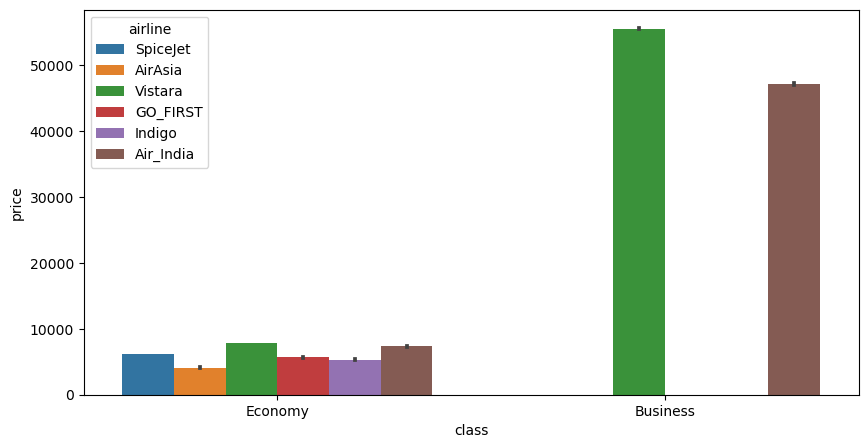

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x = 'class', y='price', hue = 'airline')
plt.show()

Vistara is having highest price for Economy and Business class.

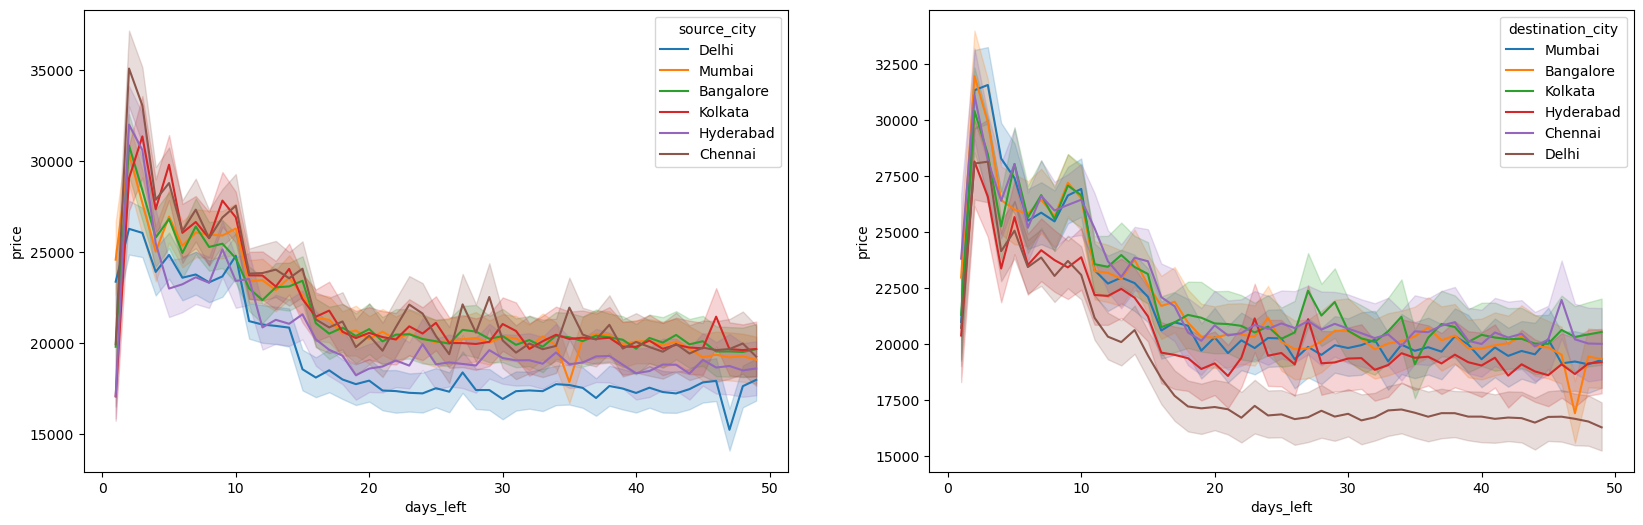

In [50]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data=df, x = 'days_left', y = 'price', hue = 'source_city', ax=ax[0])
sns.lineplot(data=df, x = 'days_left', y = 'price', hue = 'destination_city',ax=ax[1])
plt.show()

Range of price of flights with source and destination city according to the days left.

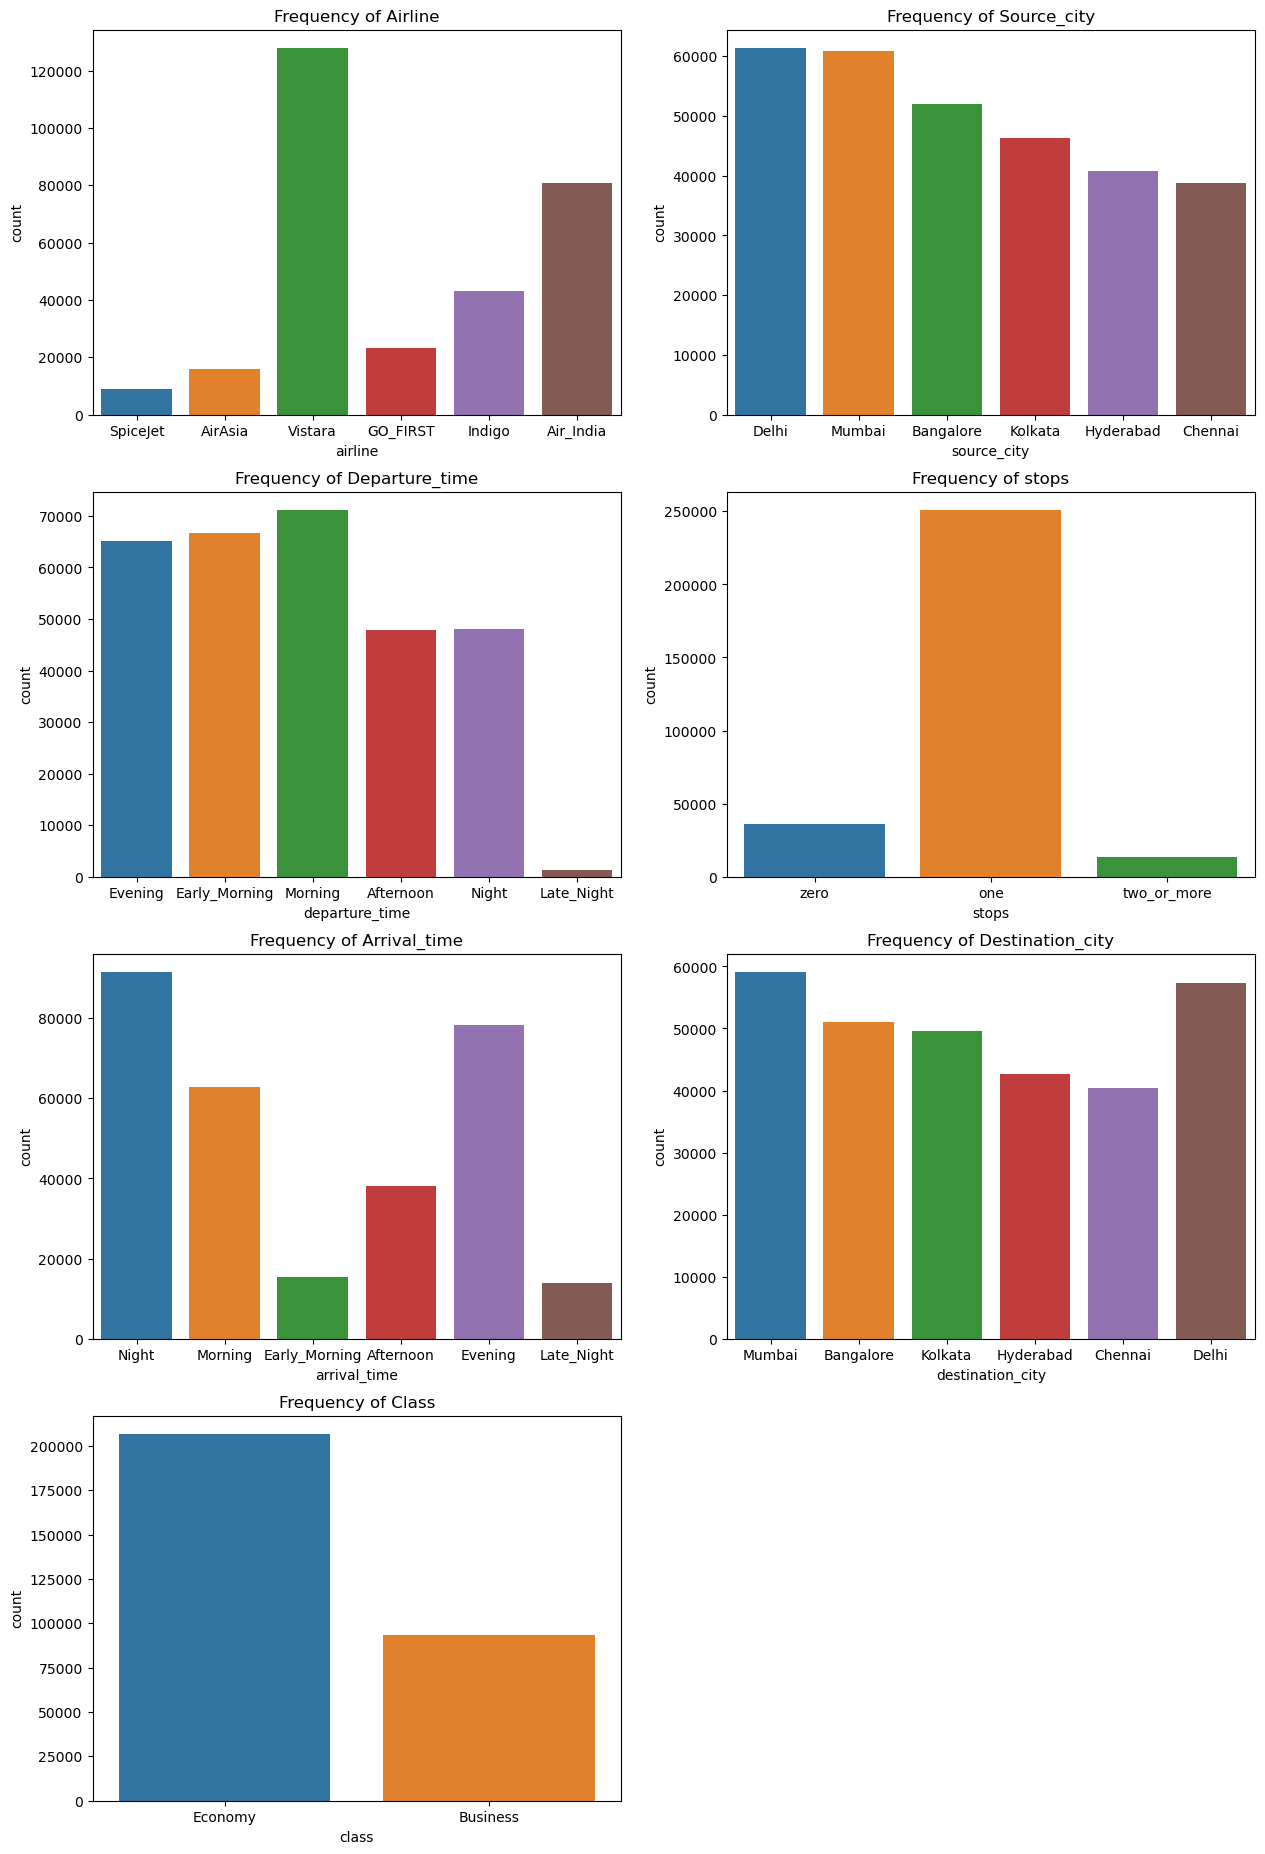

In [51]:
plt.figure(figsize=(15,23))
plt.subplot(4,2,1)
sns.countplot(x=df['airline'])
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'])
plt.title('Frequency of Source_city')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'])
plt.title('Frequency of Departure_time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'])
plt.title('Frequency of stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'])
plt.title('Frequency of Arrival_time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'])
plt.title('Frequency of Destination_city')

plt.subplot(4,2,7)
sns.countplot(x=df['class'])
plt.title('Frequency of Class')

plt.show()

Performing one hot encoding.

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


Feature Selection

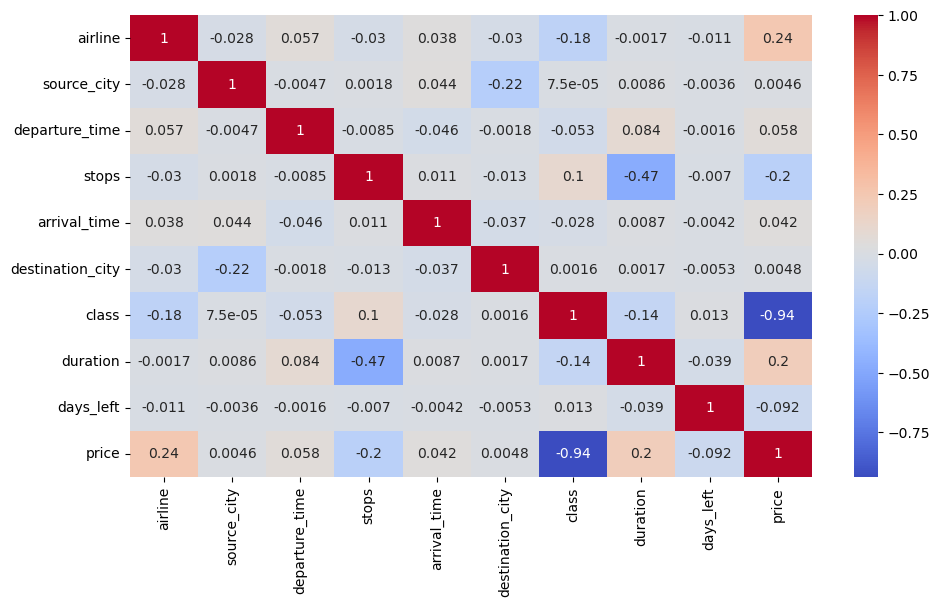

In [53]:
plt.figure(figsize=(11,6))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')
plt.show()

Plotting correlation graph to see the correlation between features and dependant variables

In [54]:
x = df.drop(columns=['price' , 'flight'])
y = df['price']

In [55]:
x.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1


In [56]:
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)


,0,1,2,3,4,5,6,7,8
0,0.488270,-0.329721,-0.237897,2.577006,1.105790,1.382425,0.672576,-1.397531,-1.843875
1,0.488270,-0.329721,-0.807934,2.577006,0.531627,1.382425,0.672576,-1.375284,-1.843875
2,-1.693633,-0.329721,-0.807934,2.577006,-1.190865,1.382425,0.672576,-1.397531,-1.843875
3,1.033746,-0.329721,0.902176,2.577006,-1.765028,1.382425,0.672576,-1.386407,-1.843875
4,1.033746,-0.329721,0.902176,2.577006,0.531627,1.382425,0.672576,-1.375284,-1.843875
...,...,...,...,...,...,...,...,...,...
300148,1.033746,-0.900576,0.902176,-0.426792,-0.616701,0.235992,-1.486822,-0.297695,1.695692
300149,1.033746,-0.900576,-1.377971,-0.426792,1.105790,0.235992,-1.486822,-0.250421,1.695692
300150,1.033746,-0.900576,-0.807934,-0.426792,1.105790,0.235992,-1.486822,0.223718,1.695692
300151,1.033746,-0.900576,-0.807934,-0.426792,-0.616701,0.235992,-1.486822,-0.308819,1.695692


In [58]:
variable = sc_x
variable.shape


(300153, 9)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range (len(x.columns))]

print(vif)

            Feature  Variance Inflation Factor
0           airline                   1.041244
1       source_city                   1.055332
2    departure_time                   1.015740
3             stops                   1.296544
4      arrival_time                   1.007628
5  destination_city                   1.054824
6             class                   1.057130
7          duration                   1.319280
8         days_left                   1.002650


Splitting the data into training and testing for building the model for prediction

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=37)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(210107, 9) (90046, 9) (210107,) (90046,)


In [94]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

    

In [80]:
from sklearn.metrics import r2_score

In [81]:
print('Test accuracy of r2_score:', r2_score(y_test,y_test_pred))
print('Train accuracy of r2_score:',r2_score(y_train,y_train_pred))


Test accuracy of r2_score: 0.9051396679657865
Train accuracy of r2_score: 0.904377071540429


In [82]:
checking = pd.DataFrame()
checking['column_names'] = x_train.columns
checking['coefficient_values'] = lr.coef_
checking

,column_names,coefficient_values
0,airline,949.539308
1,source_city,94.095496
2,departure_time,39.473687
3,stops,-3275.785504
4,arrival_time,188.612192
5,destination_city,120.986302
6,class,-44525.098287
7,duration,92.689694
8,days_left,-132.811043


In [83]:
y_test_pred = lr.predict(x_test)
y_test_pred = pd.DataFrame(y_test_pred,columns=['Pred'])
df_pred = pd.DataFrame(columns=['Actual', 'Predicted'])
df_pred['Actual'] = y_test.reset_index()['price']
df_pred['Predicted'] = y_test_pred.reset_index()['Pred']
df_pred

,Actual,Predicted
0,1788,-605.861937
1,3393,5182.436656
2,4496,7737.916226
3,31982,49340.179354
4,6437,7101.765310
...,...,...
90041,8148,12144.642444
90042,4453,8736.323282
90043,6437,3969.251985
90044,57081,56067.291165


In [84]:
from sklearn import metrics

In [85]:
print('Mean abs error:',metrics.mean_absolute_error(y_test,y_test_pred))

Mean abs error: 4639.052363610538


In [86]:
from sklearn.metrics import mean_absolute_percentage_error
print('Mean absolute percentage error:', metrics.mean_absolute_percentage_error(y_test,y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


Mean absolute percentage error: 0.4362577486363466
Mean Squared Error: 49084457.042954564
Root Mean Squared Error: 7006.030048676252


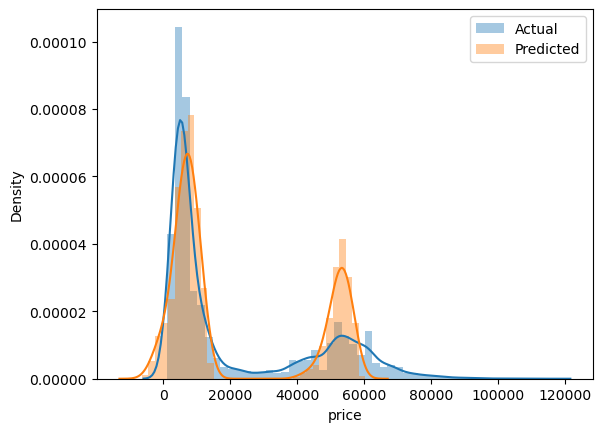

In [87]:
# Plotting Graph of actual and predicted values.
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_test_pred, label = 'Predicted')
plt.legend()
plt.show()

In [88]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)


DecisionTreeRegressor()

In [89]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)


In [90]:
print('r2_score:',r2_score(y_test,y_test_pred))
print('Mean Abs Error:',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Abs Percentage error:', metrics.mean_absolute_percentage_error(y_test,y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

r2_score: 0.9755245626229879
Mean Abs Error: 1198.7928040483014
Mean Abs Percentage error: 0.07663377996044103
Mean Squared Error: 12664551.438700156
Root Mean Squared Error: 3558.728907728173


In [91]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)


RandomForestRegressor()

In [92]:
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)


In [93]:
print('r2_score:',r2_score(y_test,y_test_pred))
print('Mean Abs Error:',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Abs Percentage error:', metrics.mean_absolute_percentage_error(y_test,y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

r2_score: 0.9850081028963918
Mean Abs Error: 1109.6196270921844
Mean Abs Percentage error: 0.07240403149193365
Mean Squared Error: 7757395.674190164
Root Mean Squared Error: 2785.2101669694807


In [ ]:
#  Linear Regression Model:
#Mean abs error: 4639.052363610538
#Mean absolute percentage error: 0.4362577486363466
#Mean Squared Error: 49084457.042954564
#Root Mean Squared Error: 7006.030048676252

#Decision Tree REgressor:
#Mean Abs Error: 1198.7928040483014
#Mean Abs Percentage error: 0.07663377996044103
#Mean Squared Error: 12664551.438700156
#Root Mean Squared Error: 3558.728907728173

# Random Forest Model:
#Mean Abs Error: 1109.6196270921844
#Mean Abs Percentage error: 0.07240403149193365
#Mean Squared Error: 7757395.674190164
#Root Mean Squared Error: 2785.2101669694807
